In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt
2D_orbit_modeling_K.pdf
2D_orbit_modeling_K1.ipynb
2D_orbit_modeling_K1.pdf
2D_orbit_modeling_K2.ipynb
2D_orbit_modeling_K2.pdf
2D_orbit_modeling_P.ipynb
2D_orbit_modeling_P.pdf
2D_orbit_modeling_e.ipynb
2D_orbit_modeling_e.pdf
2D_orbit_modeling_tau.ipynb
2D_orbit_modeling_tau.pdf
2D_orbit_modeling_w.ipynb
2D_orbit_modeling_w.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev1.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev2

In [3]:
#Read data ---#1
Input = "Linear_fit_Beuermann_2011_Table1_rev.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2400000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

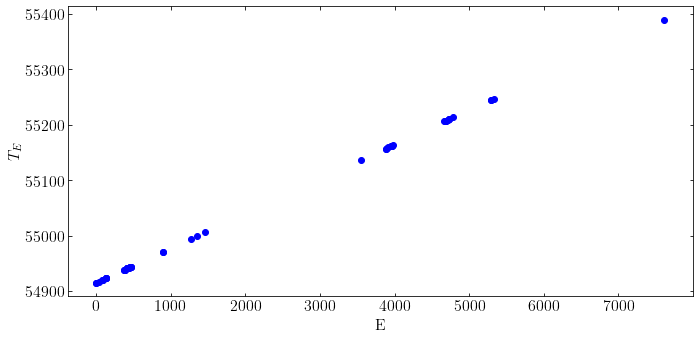

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

54


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

#params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)
params, params_covariance = optimization.curve_fit(linear_fit, x, y,sigma=dy, absolute_sigma=True)

Period = params[0]
T0 = params[1]

dPeriod = params_covariance[0,0]
dT0 = params_covariance[1,1]


print('Slope (m) is ', Period)
print('The error of the slope (dm) is ', dPeriod)
print('Intercept (c) is ', T0)
print('The error of the intercept (dc) is ', dT0)
#print(covariance)

Slope (m) is  0.06236285649304073
The error of the slope (dm) is  8.980005261065642e-19
Intercept (c) is  54914.832292031744
The error of the intercept (dc) is  7.591088868471324e-12


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
y_line = linear_fit(x_line, *params)

ys = Period*x + T0 #just only our data point
Residual = y - ys
print(y)
print(ys)
print(Residual)

print(x_line)
print(y_line)
print(len(x_line))

#np.savetxt("Linear_fit_period_year_2020g.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
n = 2
dof = len_x - n
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[54914.83228  54914.894663 54916.827926 54919.696603 54920.756784
 54922.627668 54922.690017 54922.752365 54922.814727 54937.781831
 54937.844195 54938.717285 54938.779611 54940.650507 54940.712869
 54940.775243 54940.837637 54941.773045 54941.835408 54942.646122
 54942.770852 54942.833221 54942.895591 54943.706304 54943.768653
 54943.831008 54970.647033 54970.709414 54993.658926 54998.647982
 55005.632601 55135.970976 55156.9249   55156.987244 55157.922708
 55158.982865 55160.916107 55160.978466 55161.913906 55161.976285
 55162.911738 55205.942102 55206.004463 55206.93992  55207.002308
 55208.873171 55209.870977 55209.933305 55209.995687 55212.989111
 55244.918892 55244.981257 55246.976864 55389.66308 ]
[54914.83229203 54914.89465489 54916.82790344 54919.69659484
 54920.7567634  54922.62764909 54922.69001195 54922.75237481
 54922.81473766 54937.78182322 54937.84418608 54938.71726607
 54938.77962893 54940.65051462 54940.71287748 54940.77524033
 54940.83760319 54941.77304604 54941.83540

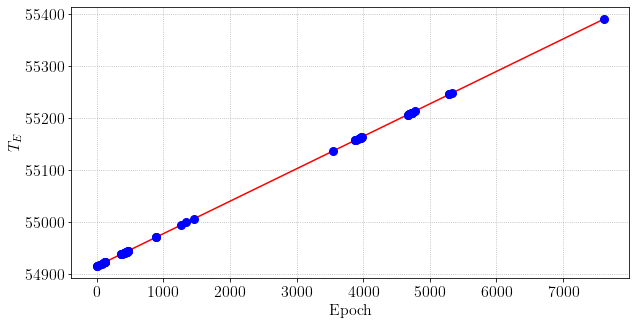

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

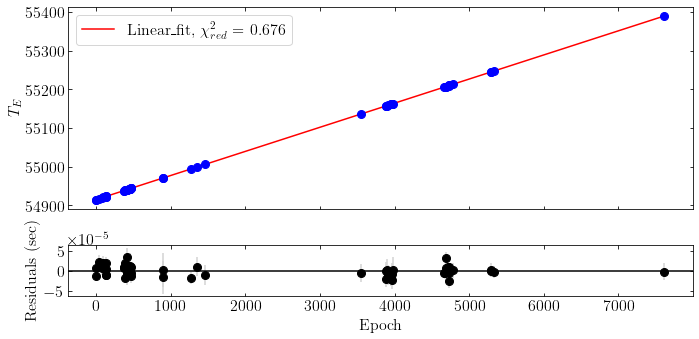

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("Linear_fit_period_year_2020g_Res.jpg", dpi=1000)

plt.show()

In [10]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
#BJD0 = 2448773.21461 - 2400000
#P0 = 0.0623628426

#Schwope_2002
BJD0 = 2448773.215071 - 2400000
dBJD0 = 0.000018
P0 = 0.06236283691
dP0 = 0.00000000070

In [11]:
t = np.linspace(40000, 60000, num=100)

x_data = []
for i in range(len(t)):
    print('%0.0f %0.5f' %(i, t[i]))
    x_data.append('%0.0f %0.5f' %(i, t[i]))
    
data_out = x_data
f = open("x_data.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

0 40000.00000
1 40202.02020
2 40404.04040
3 40606.06061
4 40808.08081
5 41010.10101
6 41212.12121
7 41414.14141
8 41616.16162
9 41818.18182
10 42020.20202
11 42222.22222
12 42424.24242
13 42626.26263
14 42828.28283
15 43030.30303
16 43232.32323
17 43434.34343
18 43636.36364
19 43838.38384
20 44040.40404
21 44242.42424
22 44444.44444
23 44646.46465
24 44848.48485
25 45050.50505
26 45252.52525
27 45454.54545
28 45656.56566
29 45858.58586
30 46060.60606
31 46262.62626
32 46464.64646
33 46666.66667
34 46868.68687
35 47070.70707
36 47272.72727
37 47474.74747
38 47676.76768
39 47878.78788
40 48080.80808
41 48282.82828
42 48484.84848
43 48686.86869
44 48888.88889
45 49090.90909
46 49292.92929
47 49494.94949
48 49696.96970
49 49898.98990
50 50101.01010
51 50303.03030
52 50505.05051
53 50707.07071
54 50909.09091
55 51111.11111
56 51313.13131
57 51515.15152
58 51717.17172
59 51919.19192
60 52121.21212
61 52323.23232
62 52525.25253
63 52727.27273
64 52929.29293
65 53131.31313
66 53333.33333
67 53

In [12]:
#Input data
Input = "x_data.out"
Data   = np.genfromtxt(Input)

x = Data[:,1]
#print(t)

t = x
len_x = len(t)

Epoch = (t-BJD0)/P0

In [13]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [14]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [15]:
#Parameters
K = 33.7       
P = 10220       
e = 0             
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = 0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("dT0_output_a.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.55869 46139.69131 46141.61722 -1.92591
40202.02020 4.68289 4.68289 46337.55838 46343.63742 -6.07904
40404.04040 4.80709 4.80709 46535.51906 46545.65762 -10.13856
40606.06061 4.93129 4.93129 46733.63591 46747.67783 -14.04192
40808.08081 5.05549 5.05549 46931.96904 46949.69803 -17.72899
41010.10101 5.17969 5.17969 47130.57526 47151.71823 -21.14297
41212.12121 5.30389 5.30389 47329.50718 47353.73843 -24.23125
41414.14141 5.42810 5.42810 47528.81236 47555.75863 -26.94627
41616.16162 5.55230 5.55230 47728.53265 47757.77884 -29.24619
41818.18182 5.67650 5.67650 47928.70346 47959.79904 -31.09558
42020.20202 5.80070 5.80070 48129.35330 48161.81924 -32.46594
42222.22222 5.92490 5.92490 48330.50327 48363.83944 -33.33617
42424.24242 6.04910 6.04910 48532.16679 48565.85964 -33.69285
42626.26263 6.17330 6.17330 48734.34936 48767.87985 -33.53050
42828.28283 0.01431 0.01431 48937.04845 48969.90005 -32.85160
43030.30303 0.

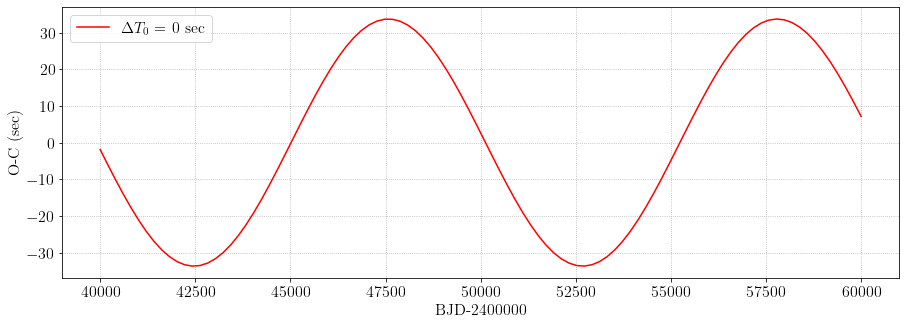

In [16]:
InputFile_out = "dT0_output_a.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_a = Data_out[:,0]
y_a = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\Delta T_{0}$ = 0 sec')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [17]:
#Parameters
K = 33.7       
P = 10220       
e = 0              
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = 2
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("dT0_output_b.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.55869 46139.69131 46141.61722 0.07409
40202.02020 4.68289 4.68289 46337.55838 46343.63742 -4.07904
40404.04040 4.80709 4.80709 46535.51906 46545.65762 -8.13856
40606.06061 4.93129 4.93129 46733.63591 46747.67783 -12.04192
40808.08081 5.05549 5.05549 46931.96904 46949.69803 -15.72899
41010.10101 5.17969 5.17969 47130.57526 47151.71823 -19.14297
41212.12121 5.30389 5.30389 47329.50718 47353.73843 -22.23125
41414.14141 5.42810 5.42810 47528.81236 47555.75863 -24.94627
41616.16162 5.55230 5.55230 47728.53265 47757.77884 -27.24619
41818.18182 5.67650 5.67650 47928.70346 47959.79904 -29.09558
42020.20202 5.80070 5.80070 48129.35330 48161.81924 -30.46594
42222.22222 5.92490 5.92490 48330.50327 48363.83944 -31.33617
42424.24242 6.04910 6.04910 48532.16679 48565.85964 -31.69285
42626.26263 6.17330 6.17330 48734.34936 48767.87985 -31.53050
42828.28283 0.01431 0.01431 48937.04845 48969.90005 -30.85160
43030.30303 0.13

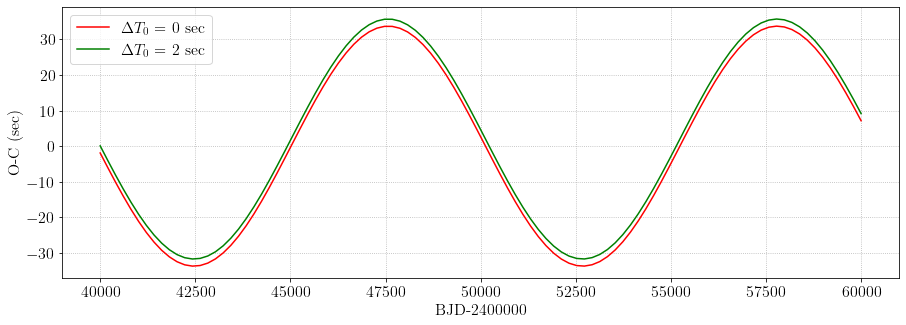

In [18]:
InputFile_out = "dT0_output_b.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_b = Data_out[:,0]
y_b = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\Delta T_{0}$ = 0 sec')
plt.plot(x_b, y_b, '-', color='green',label=r'$\Delta T_{0}$ = 2 sec')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [19]:
#Parameters
K = 33.7       
P = 10220       
e = 0            
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = 4
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("dT0_output_c.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.55869 46139.69131 46141.61722 2.07409
40202.02020 4.68289 4.68289 46337.55838 46343.63742 -2.07904
40404.04040 4.80709 4.80709 46535.51906 46545.65762 -6.13856
40606.06061 4.93129 4.93129 46733.63591 46747.67783 -10.04192
40808.08081 5.05549 5.05549 46931.96904 46949.69803 -13.72899
41010.10101 5.17969 5.17969 47130.57526 47151.71823 -17.14297
41212.12121 5.30389 5.30389 47329.50718 47353.73843 -20.23125
41414.14141 5.42810 5.42810 47528.81236 47555.75863 -22.94627
41616.16162 5.55230 5.55230 47728.53265 47757.77884 -25.24619
41818.18182 5.67650 5.67650 47928.70346 47959.79904 -27.09558
42020.20202 5.80070 5.80070 48129.35330 48161.81924 -28.46594
42222.22222 5.92490 5.92490 48330.50327 48363.83944 -29.33617
42424.24242 6.04910 6.04910 48532.16679 48565.85964 -29.69285
42626.26263 6.17330 6.17330 48734.34936 48767.87985 -29.53050
42828.28283 0.01431 0.01431 48937.04845 48969.90005 -28.85160
43030.30303 0.13

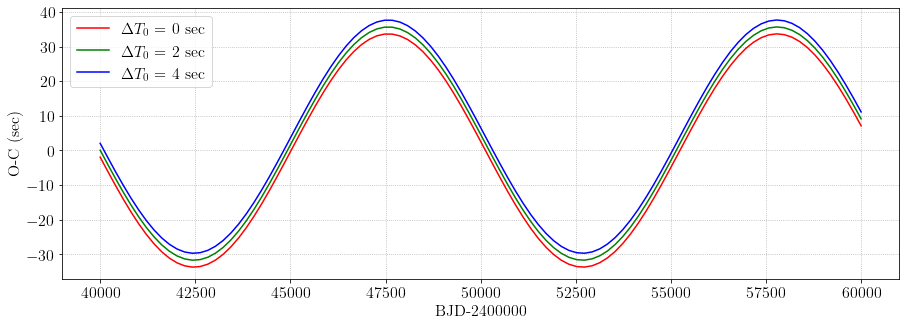

In [20]:
InputFile_out = "dT0_output_c.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_c = Data_out[:,0]
y_c = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\Delta T_{0}$ = 0 sec')
plt.plot(x_b, y_b, '-', color='green',label=r'$\Delta T_{0}$ = 2 sec')
plt.plot(x_c, y_c, '-', color='blue',label=r'$\Delta T_{0}$ = 4 sec')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [21]:
#Parameters
K = 33.7       
P = 10220       
e = 0              
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = 6
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("dT0_output_d.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.55869 46139.69131 46141.61722 4.07409
40202.02020 4.68289 4.68289 46337.55838 46343.63742 -0.07904
40404.04040 4.80709 4.80709 46535.51906 46545.65762 -4.13856
40606.06061 4.93129 4.93129 46733.63591 46747.67783 -8.04192
40808.08081 5.05549 5.05549 46931.96904 46949.69803 -11.72899
41010.10101 5.17969 5.17969 47130.57526 47151.71823 -15.14297
41212.12121 5.30389 5.30389 47329.50718 47353.73843 -18.23125
41414.14141 5.42810 5.42810 47528.81236 47555.75863 -20.94627
41616.16162 5.55230 5.55230 47728.53265 47757.77884 -23.24619
41818.18182 5.67650 5.67650 47928.70346 47959.79904 -25.09558
42020.20202 5.80070 5.80070 48129.35330 48161.81924 -26.46594
42222.22222 5.92490 5.92490 48330.50327 48363.83944 -27.33617
42424.24242 6.04910 6.04910 48532.16679 48565.85964 -27.69285
42626.26263 6.17330 6.17330 48734.34936 48767.87985 -27.53050
42828.28283 0.01431 0.01431 48937.04845 48969.90005 -26.85160
43030.30303 0.138

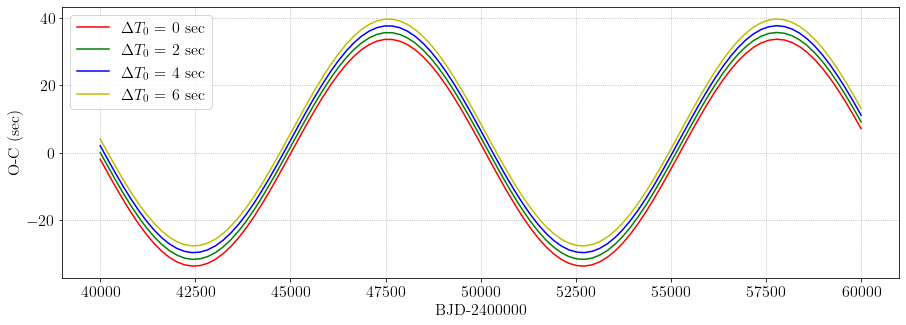

In [22]:
InputFile_out = "dT0_output_d.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_d = Data_out[:,0]
y_d = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\Delta T_{0}$ = 0 sec')
plt.plot(x_b, y_b, '-', color='green',label=r'$\Delta T_{0}$ = 2 sec')
plt.plot(x_c, y_c, '-', color='blue',label=r'$\Delta T_{0}$ = 4 sec')
plt.plot(x_d, y_d, '-', color='y',label=r'$\Delta T_{0}$ = 6 sec')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [23]:
#Parameters
K = 33.7       
P = 10220       
e = 0             
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = 8
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("dT0_output_e.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.55869 46139.69131 46141.61722 6.07409
40202.02020 4.68289 4.68289 46337.55838 46343.63742 1.92096
40404.04040 4.80709 4.80709 46535.51906 46545.65762 -2.13856
40606.06061 4.93129 4.93129 46733.63591 46747.67783 -6.04192
40808.08081 5.05549 5.05549 46931.96904 46949.69803 -9.72899
41010.10101 5.17969 5.17969 47130.57526 47151.71823 -13.14297
41212.12121 5.30389 5.30389 47329.50718 47353.73843 -16.23125
41414.14141 5.42810 5.42810 47528.81236 47555.75863 -18.94627
41616.16162 5.55230 5.55230 47728.53265 47757.77884 -21.24619
41818.18182 5.67650 5.67650 47928.70346 47959.79904 -23.09558
42020.20202 5.80070 5.80070 48129.35330 48161.81924 -24.46594
42222.22222 5.92490 5.92490 48330.50327 48363.83944 -25.33617
42424.24242 6.04910 6.04910 48532.16679 48565.85964 -25.69285
42626.26263 6.17330 6.17330 48734.34936 48767.87985 -25.53050
42828.28283 0.01431 0.01431 48937.04845 48969.90005 -24.85160
43030.30303 0.13851

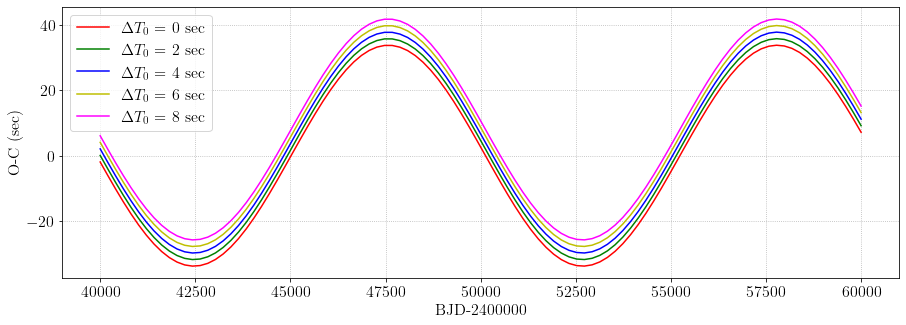

In [24]:
InputFile_out = "dT0_output_e.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_e = Data_out[:,0]
y_e = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\Delta T_{0}$ = 0 sec')
plt.plot(x_b, y_b, '-', color='green',label=r'$\Delta T_{0}$ = 2 sec')
plt.plot(x_c, y_c, '-', color='blue',label=r'$\Delta T_{0}$ = 4 sec')
plt.plot(x_d, y_d, '-', color='y',label=r'$\Delta T_{0}$ = 6 sec')
plt.plot(x_e, y_e, '-', color='magenta',label=r'$\Delta T_{0}$ = 8 sec')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_dT0_rev2.pdf", format='pdf', dpi=1200)
plt.show()